# CosmicFishPie 

In [1]:
%load_ext autoreload
%autoreload 2

# Table of Contents

[Settings](#settings)

[Cosmological parameters](#cosmological-parameters)

[Background functions](#background-functions)

[Power spectrum](#power-spectrum)


# Settings

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
snscolors = sns.color_palette("colorblind")

In [3]:
from cosmicfishpie.fishermatrix import cosmicfish

# Cosmological parameters

In [17]:
fiducial = {
    "Omegam": 0.32,
    "Omegab": 0.05,
    "h": 0.67,
    "ns": 0.96,
    "sigma8": 0.815584,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}

options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "camb",   ## change here to 'class' or to 'symbolic', to get the cosmology from other codes
    "specs_dir": "../survey_specifications/",
    "outroot": "results/cosmology",
    "cosmo_model": "w0waCDM",
}

In [6]:
# This notebook only plots background quantities and perturbations, so the observables do not matter.
observables = ["GCph", "WL"]

### Pass options and parameters to CosmicFishPie

In [8]:
cosmoFM_A = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
)

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************


Using default specifications for spectroscopic: /home/santiago/CosmoProjects/CosmicJellyFish/cosmicfishpie/cosmicfishpie/configs/default_survey_specifications/Euclid-Spectroscopic-ISTF-Pessimistic.yaml

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic
Using default specifications for photo: /home/santiago/CosmoProjects/CosmicJellyFish/cosmicfishpie/cosmicfishpie/configs/default_survey_specifications/Euclid-Photometric-ISTF-Pessimistic.yaml

  -> Survey loaded:  Euclid-Photometric-ISTF-Pessimistic

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   7.19 s


###  Let's first extract the cosmological ingredients separately

In [9]:
zz = np.linspace(0.001, 5.0, 250)  # declare a z-array
kk = np.logspace(np.log10(1e-3), np.log10(10), 250)  # declare a k-array

In [10]:
cosmofuncs = cosmoFM_A.fiducialcosmo

### List all the available cosmological functions

In [11]:
method_list = [
    attribute
    for attribute in dir(cosmofuncs)
    if callable(getattr(cosmofuncs, attribute)) and attribute.startswith("__") is False
]
print(method_list)

['E_hubble', 'Hubble', 'Omegam_of_z', 'Pcb', 'Pmm', 'SigmaMG', 'angdist', 'cmb_power', 'comoving', 'f_growthrate', 'fsigma8_of_z', 'growth', 'matpow', 'nonwiggle_pow', 'scale_factor', 'sigma8_of_z']


### Background and linear perturbations

In [12]:
chi_z = cosmofuncs.comoving(zz)
ang_z = cosmofuncs.angdist(zz)
hub_z = cosmofuncs.Hubble(zz, physical=True)
D_growth_z = cosmofuncs.growth(zz)
f_growthrate_z = cosmofuncs.f_growthrate(zz)

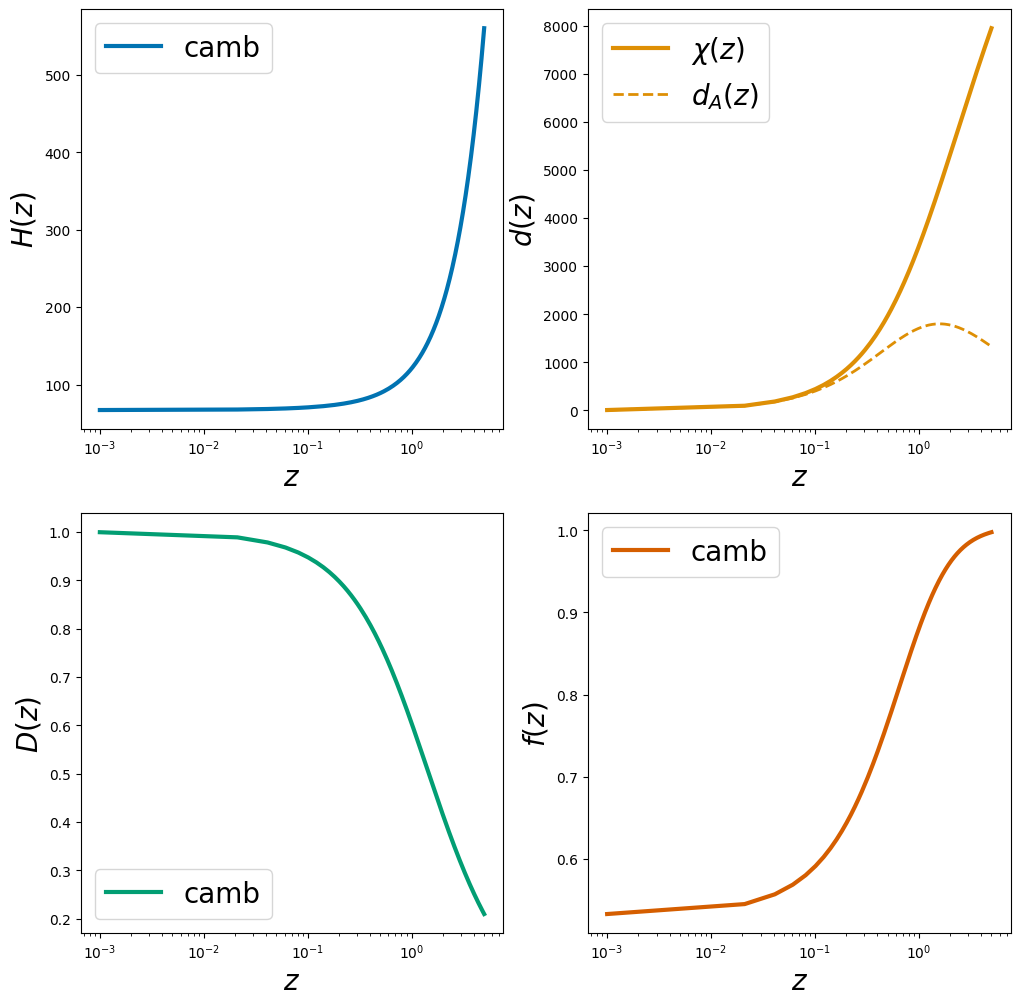

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
codelab = options["code"]
axs[0, 0].semilogx(zz, hub_z, color=snscolors[0], lw=3, label=codelab)
axs[0, 0].set_xlabel("$z$", fontsize=20)
axs[0, 0].set_ylabel(r"$H(z)$", fontsize=20)
axs[0, 0].legend(loc="best", fontsize=20)

axs[0, 1].semilogx(zz, chi_z, color=snscolors[1], lw=3, label=r"$\chi(z)$")
axs[0, 1].semilogx(zz, ang_z, color=snscolors[1], lw=2, ls="--", label=r"$d_A (z)$")
axs[0, 1].set_xlabel("$z$", fontsize=20)
axs[0, 1].set_ylabel(r"$d(z)$", fontsize=20)
axs[0, 1].legend(loc="best", fontsize=20)

axs[1, 0].semilogx(zz, D_growth_z, color=snscolors[2], lw=3, label=codelab)
axs[1, 0].set_xlabel("$z$", fontsize=20)
axs[1, 0].set_ylabel(r"$D(z)$", fontsize=20)
axs[1, 0].legend(loc="best", fontsize=20)

axs[1, 1].semilogx(zz, f_growthrate_z, color=snscolors[3], lw=3, label=codelab)
axs[1, 1].set_xlabel("$z$", fontsize=20)
axs[1, 1].set_ylabel(r"$f(z)$", fontsize=20)
axs[1, 1].legend(loc="best", fontsize=20)

# Power-spectrum

## Linear and Non-linear power spectrum

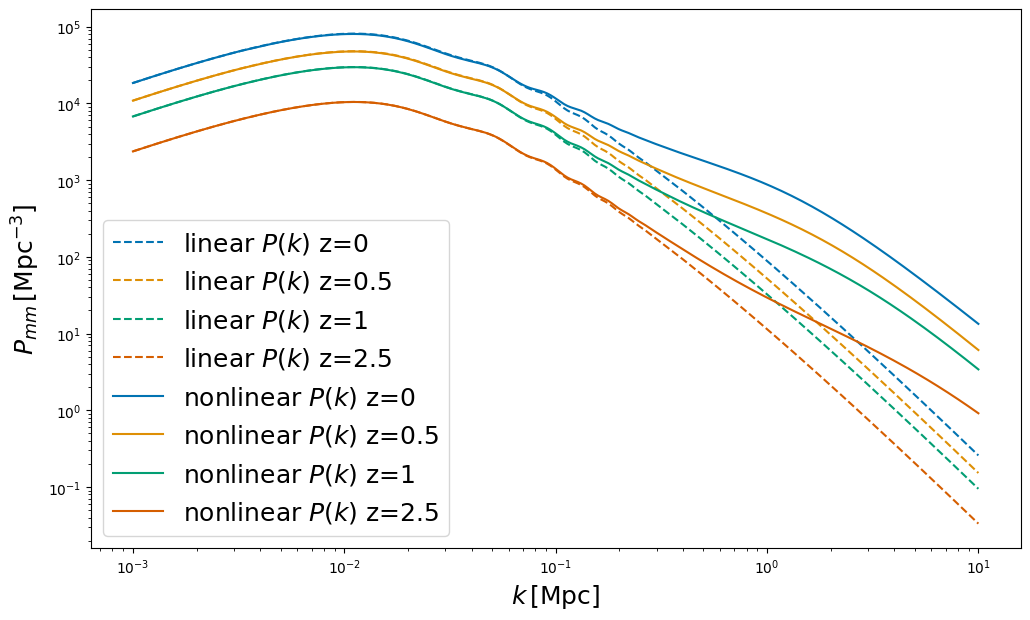

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
color = iter(snscolors)
zplot = [0, 0.5, 1, 2.5]
for zii in zplot:
    c = next(color)
    axs.loglog(
        kk,
        cosmofuncs.matpow(zii, kk, nonlinear=False),
        ls="--",
        c=c,
        label="linear $P(k)$ z=%s" % zii,
    )
axs.set_xlabel(r"$k \, [\mathrm{Mpc}]$", fontsize=18)
axs.set_ylabel(r"$P_{mm} \, [\mathrm{Mpc}^{-3}]$", fontsize=18)
color = iter(snscolors)
for zii in zplot:
    c = next(color)
    axs.loglog(
        kk,
        cosmofuncs.matpow(zii, kk, nonlinear=True),
        ls="-",
        c=c,
        label="nonlinear $P(k)$ z=%s" % zii,
    )
axs.legend(fontsize=18)